In [26]:
from google.colab import drive
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import csv
import seaborn as sns

In [27]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
FILE_PATH="/content/drive/MyDrive/Colab Notebooks/ssafy_pjt2"

In [29]:
os.chdir(FILE_PATH)

In [30]:
!apt -qq -y install fonts-nanum > /dev/null
fontpath='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()
%config InlineBackend.figure_format = 'retina'
plt.rc('font', family="NanumBarunGothic")

In [31]:
data_file = pd.read_json("food_nutrition_DB_total.json", encoding='utf8')

In [32]:
len(data_file['I2790']['row'])

90608

In [33]:
nutrition_name_dict=dict()
nutrition_name_dict['NUM'] = '번호'
nutrition_name_dict['FOOD_CD'] = '식품코드'
nutrition_name_dict['SAMPLING_REGION_NAME'] = '지역명'
nutrition_name_dict['SAMPLING_MONTH_NAME'] = '채취월'
nutrition_name_dict['SAMPLING_REGION_CD'] = '지역코드'
nutrition_name_dict['SAMPLING_MONTH_CD'] = '채취월코드'
nutrition_name_dict['GROUP_NAME'] = '식품군'
nutrition_name_dict['DESC_KOR'] = '식품이름'
nutrition_name_dict['RESEARCH_YEAR'] = '조사년도'
nutrition_name_dict['SAMPLING_REGION_NAME'] = '지역명'
nutrition_name_dict['MAKER_NAME'] = '제조사명'
nutrition_name_dict['SUB_REF_NAME'] = '자료출처'
nutrition_name_dict['SERVING_SIZE'] = '총내용량'
nutrition_name_dict['NUTR_CONT1'] = '열량(kcal)(1회제공량당)'
nutrition_name_dict['NUTR_CONT2'] = '탄수화물(g)(1회제공량당)'
nutrition_name_dict['NUTR_CONT3'] = '단백질(g)(1회제공량당)'
nutrition_name_dict['NUTR_CONT4'] = '지방(g)(1회제공량당)'
nutrition_name_dict['NUTR_CONT5'] = '당류(g)(1회제공량당)'
nutrition_name_dict['NUTR_CONT6'] = '나트륨(mg)(1회제공량당)'
nutrition_name_dict['NUTR_CONT7'] = '콜레스테롤(mg)(1회제공량당)'
nutrition_name_dict['NUTR_CONT8'] = '포화지방산(g)(1회제공량당)'
nutrition_name_dict['NUTR_CONT9'] = '트랜스지방(g)(1회제공량당)'

In [34]:
data_file['I2790']['row'][0]

{'NUTR_CONT8': '1.9',
 'NUTR_CONT9': '0.1',
 'NUTR_CONT4': '8.5',
 'NUTR_CONT5': '16.9',
 'NUTR_CONT6': '1264.31',
 'NUM': '1',
 'NUTR_CONT7': '106.18',
 'NUTR_CONT1': '368.8',
 'NUTR_CONT2': '39.7',
 'SUB_REF_NAME': "식약처('16) 제4권",
 'NUTR_CONT3': '33.5',
 'RESEARCH_YEAR': '2019',
 'MAKER_NAME': '',
 'GROUP_NAME': '',
 'SERVING_SIZE': '500',
 'SAMPLING_REGION_NAME': '충주',
 'SAMPLING_MONTH_CD': 'AVG',
 'SAMPLING_MONTH_NAME': '평균',
 'DESC_KOR': '꿩불고기',
 'SAMPLING_REGION_CD': '94',
 'FOOD_CD': 'D000006'}

In [35]:
with open('food_nutrition_DB.csv', 'w', newline='') as f:
    fieldnames = list(data_file['I2790']['row'][0].keys())
    for index, name in enumerate(fieldnames):
        if name in nutrition_name_dict:
            fieldnames[index] = nutrition_name_dict[name]
    w = csv.writer(f)
    w.writerow(fieldnames)

    for row in data_file['I2790']['row']:
        values = list(row.values())       
        w.writerow(values)




In [36]:
data_file['I2790']['row'][0]['NUTR_CONT1']

'368.8'

In [37]:
row_cnt = len(data_file['I2790']['row'])
mapred_category=["NUM", "NUTR_CONT2", "NUTR_CONT3", "NUTR_CONT4"]
with open('food_nutrition_DB_for_mapred.csv', 'w', newline='') as f:
    fieldnames = ["NUM", "탄수화물(g)(1회제공량당)", "단백질(g)(1회제공량당)", "지방(g)(1회제공량당)"]
    
    w = csv.DictWriter(f, fieldnames=fieldnames)
    w.writeheader()
    for i in range(row_cnt):
        w.writerow({"NUM": data_file['I2790']['row'][i]['NUM'], "탄수화물(g)(1회제공량당)": data_file['I2790']['row'][i]['NUTR_CONT2'], "단백질(g)(1회제공량당)": data_file['I2790']['row'][i]['NUTR_CONT3'], "지방(g)(1회제공량당)": data_file['I2790']['row'][i]['NUTR_CONT4']})

In [38]:
type(data_file['I2790']['row'][0:5])

list

In [39]:
row_counts=[0 for i in range(len(nutrition_name_dict))]
row_counts

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [40]:
for index in range(row_cnt):
    for i, value in enumerate(data_file['I2790']['row'][index].values()):
        if(value == ''):
            continue
        else:
            row_counts[i]+=1


In [41]:
row_counts

[87988,
 79903,
 81868,
 88510,
 87653,
 90608,
 79127,
 89684,
 81433,
 90608,
 88624,
 90608,
 85289,
 82904,
 90608,
 90608,
 90608,
 90608,
 90608,
 90608,
 90608]

In [42]:
min(row_counts)

79127

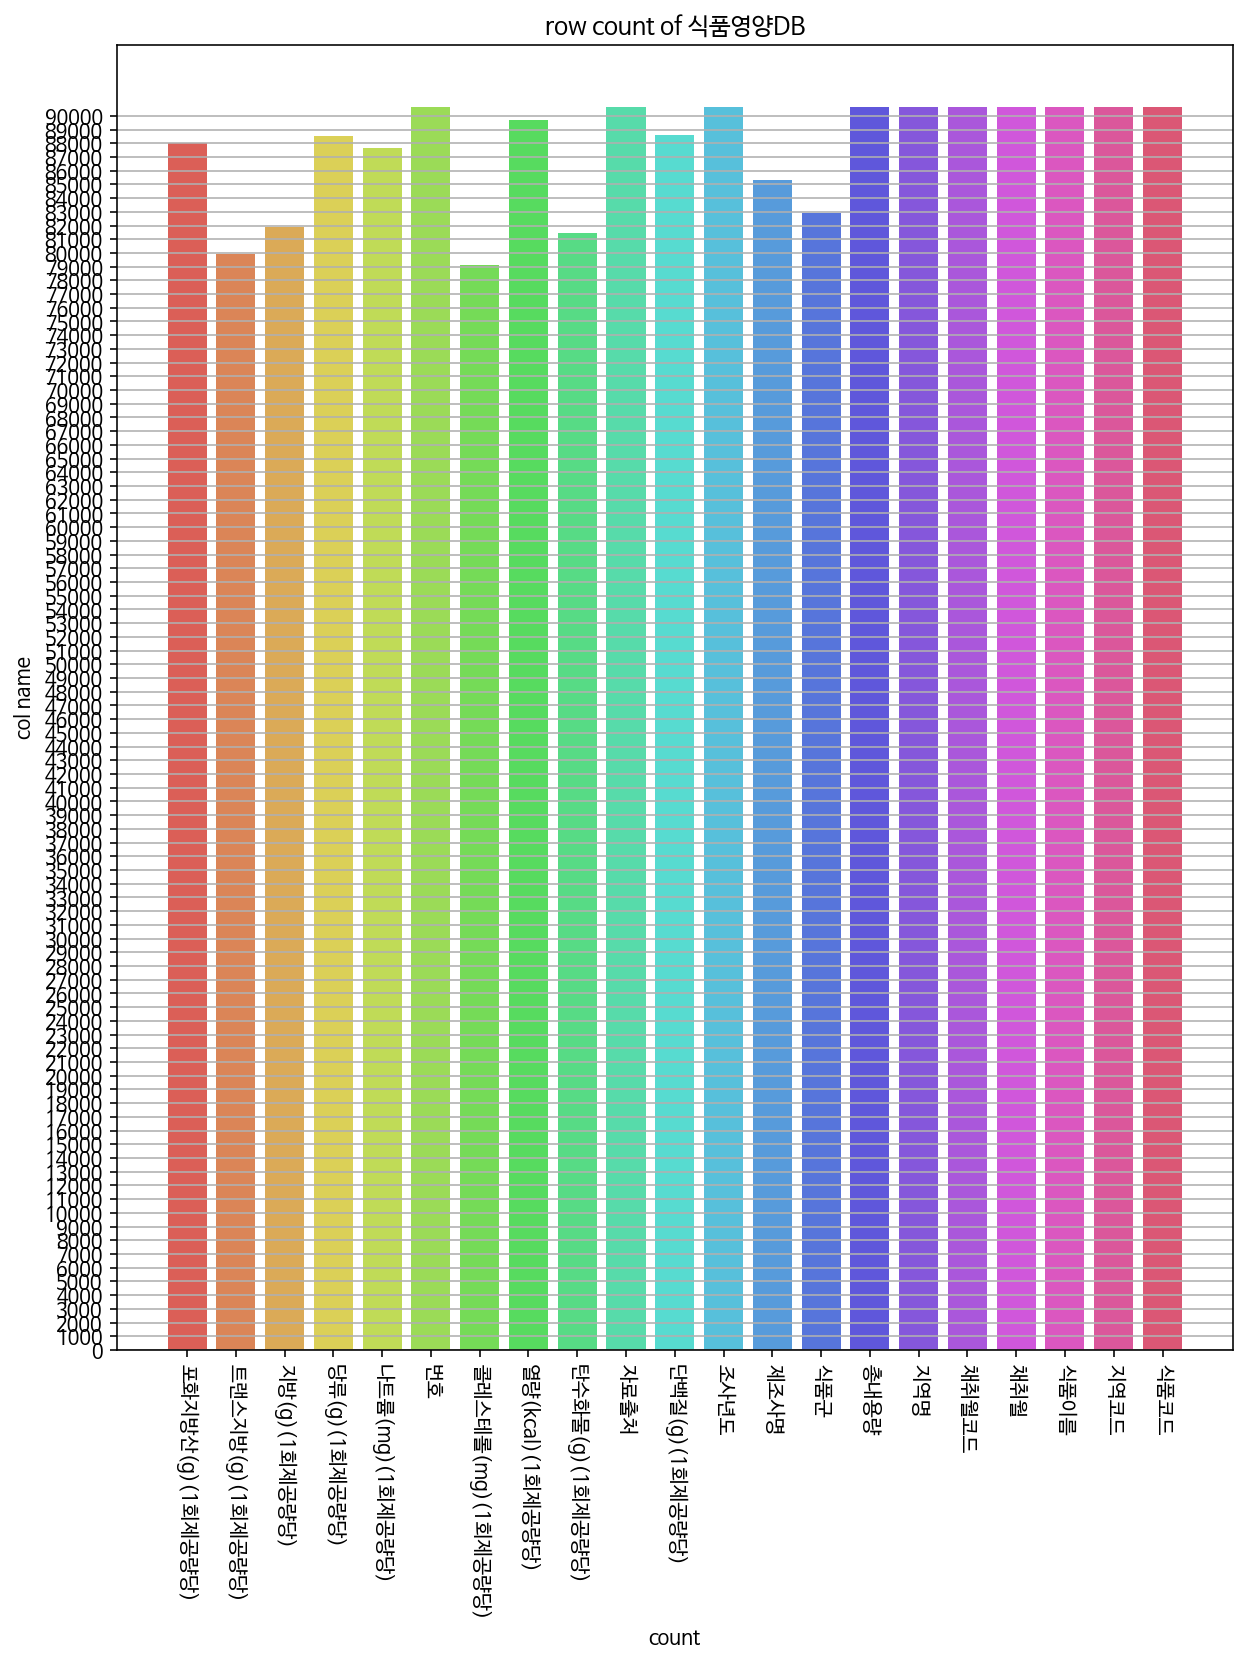

In [43]:
plt.figure(figsize=(10, 12))
colors = sns.color_palette('hls', len(nutrition_name_dict))
plt.title('row count of 식품영양DB')
plt.bar(np.arange(len(nutrition_name_dict)), row_counts, color=colors)
plt.xlabel("count")
plt.ylabel("col name")
major_yticks=[i for i in range(0, max(row_counts), 1000)]
major_xticks = []
for col_name in data_file['I2790']['row'][0].keys():
    major_xticks.append(nutrition_name_dict[col_name])
plt.yticks(major_yticks)
plt.xticks(np.arange(len(nutrition_name_dict)), major_xticks, rotation=270)
plt.grid(True, axis='y')
plt.savefig("식품영양DB_row_count.png")
plt.show()